## Here are the main steps we will go through:

1. Business objective.<br>


2. Get the data.<br>


3. Discover and visualize the data to gain insights.<br>


4. Prepare the data for Machine Learning algorithms.<br>


5. Select a model and train it.<br>


6. Fine-tune the selected model.<br>


7. Present our solution.<br>


8. Launch, monitor, and maintain our system.

### 1. Business objective:

The first question to ask your boss is what exactly the business objective is.
Building a model is probably not the end goal. How does the company expect
to use and benefit from this model? Knowing the objective is important because it determines how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort is required to build it.<br>

In this project different machine learning algorithms were trained on the online superstore sales dataset to select the best fit model to predict profit based on different features in the dataset. Note that: the model was later deployed in production on the google cloud infrastructre.

__Some of the most important supervised learning algorithms include:__<br>

* k-Nearest Neighbors <br>
* Linear Regression <br>
* Logistic Regression <br>
* Support Vector Machines (SVMs) <br>
* Decision Trees and Random Forests <br>
* Neural networks

In [1]:
# import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.context("seaborn-darkgrid")
import warnings
warnings.filterwarnings("ignore")

### 2. Get the data.

In [2]:
df=pd.read_csv('C:\\Users\\MULIMBIKA MAKINA\\Desktop\\SUPERSTORE DATA\\sample_superstore.csv',encoding='cp1252')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### 3. Data exploration.

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

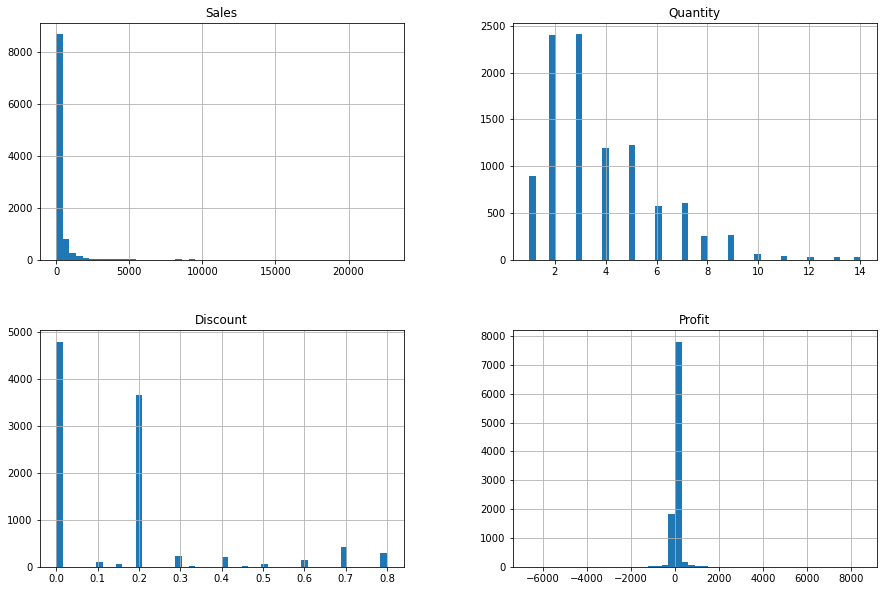

In [5]:
df[['Sales','Quantity','Discount','Profit']].hist(bins=50, figsize=(15,10))
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [8]:
df.groupby('Segment')['Segment'].agg('count')

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [9]:
df.groupby('Category')['Category'].agg('count')

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

In [10]:
df.groupby('Ship Mode')['Ship Mode'].agg('count')

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

####  Data cleaning

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Feature engineering

__Drop some features which are not usiful.__

In [12]:
df1 = df.drop(['Row ID','Order ID','Customer Name', 'Ship Date','Ship Mode','Customer ID', 'Country','Postal Code', 'Region', 'Product ID','Sub-Category','Product Name'], axis='columns')
df1.head()

,Order Date,Segment,City,State,Category,Sales,Quantity,Discount,Profit
0,11/8/2016,Consumer,Henderson,Kentucky,Furniture,261.9600,2,0.00,41.9136
1,11/8/2016,Consumer,Henderson,Kentucky,Furniture,731.9400,3,0.00,219.5820
2,6/12/2016,Corporate,Los Angeles,California,Office Supplies,14.6200,2,0.00,6.8714
3,10/11/2015,Consumer,Fort Lauderdale,Florida,Furniture,957.5775,5,0.45,-383.0310
4,10/11/2015,Consumer,Fort Lauderdale,Florida,Office Supplies,22.3680,2,0.20,2.5164


In [13]:
# Let us compute the price per unit for each product. This will help us in outlier detection
# We first create a copy
df2 = df1.copy()
df2.head()

,Order Date,Segment,City,State,Category,Sales,Quantity,Discount,Profit
0,11/8/2016,Consumer,Henderson,Kentucky,Furniture,261.9600,2,0.00,41.9136
1,11/8/2016,Consumer,Henderson,Kentucky,Furniture,731.9400,3,0.00,219.5820
2,6/12/2016,Corporate,Los Angeles,California,Office Supplies,14.6200,2,0.00,6.8714
3,10/11/2015,Consumer,Fort Lauderdale,Florida,Furniture,957.5775,5,0.45,-383.0310
4,10/11/2015,Consumer,Fort Lauderdale,Florida,Office Supplies,22.3680,2,0.20,2.5164


__Add price per unit variable__

In [14]:
df2['Price per unit'] = df2['Sales']/df2['Quantity']

In [15]:
df2.head()

,Order Date,Segment,City,State,Category,Sales,Quantity,Discount,Profit,Price per unit
0,11/8/2016,Consumer,Henderson,Kentucky,Furniture,261.9600,2,0.00,41.9136,130.9800
1,11/8/2016,Consumer,Henderson,Kentucky,Furniture,731.9400,3,0.00,219.5820,243.9800
2,6/12/2016,Corporate,Los Angeles,California,Office Supplies,14.6200,2,0.00,6.8714,7.3100
3,10/11/2015,Consumer,Fort Lauderdale,Florida,Furniture,957.5775,5,0.45,-383.0310,191.5155
4,10/11/2015,Consumer,Fort Lauderdale,Florida,Office Supplies,22.3680,2,0.20,2.5164,11.1840


__Convert Order Date column to standard datetime format__.

In [16]:
df2['Order Date']=pd.to_datetime(df['Order Date'])


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      9994 non-null   datetime64[ns]
 1   Segment         9994 non-null   object        
 2   City            9994 non-null   object        
 3   State           9994 non-null   object        
 4   Category        9994 non-null   object        
 5   Sales           9994 non-null   float64       
 6   Quantity        9994 non-null   int64         
 7   Discount        9994 non-null   float64       
 8   Profit          9994 non-null   float64       
 9   Price per unit  9994 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 780.9+ KB


__Remove white spaces in column names__

In [18]:
df2.columns = df2.columns.str.replace(' ','')

In [19]:
df2.head(2)

,OrderDate,Segment,City,State,Category,Sales,Quantity,Discount,Profit,Priceperunit
0,2016-11-08,Consumer,Henderson,Kentucky,Furniture,261.96,2,0.0,41.9136,130.98
1,2016-11-08,Consumer,Henderson,Kentucky,Furniture,731.94,3,0.0,219.5820,243.98


__Add some features to the DataFrame__

In [20]:
from datetime import datetime as dt

In [21]:
# add a new column 'day_of_week' that contains the day numbers (0-6) of the week extracted from the order_date column
df2['day_of_week'] = df2['OrderDate'].dt.weekday

In [22]:
# add a new column 'week_name' that contains the week names extracted from the order_date column
df2['week_name'] = df2['OrderDate'].dt.strftime('%A')

In [23]:
# add a new column 'month_number' that contains the month numbers extracted from the order_date column

df2['month_number'] = df2['OrderDate'].dt.month

In [24]:
# add a new column 'month_name' that contains the month names extracted from the order_date column
df2['month_name'] = df2['OrderDate'].dt.strftime('%B')

In [25]:
# add a new column 'year' that contains the year extracted from the order_date column
df2['year'] = df2['OrderDate'].dt.year

In [26]:
df2.head(3)

,OrderDate,Segment,City,State,Category,Sales,Quantity,Discount,Profit,Priceperunit,day_of_week,week_name,month_number,month_name,year
0,2016-11-08,Consumer,Henderson,Kentucky,Furniture,261.96,2,0.0,41.9136,130.98,1,Tuesday,11,November,2016
1,2016-11-08,Consumer,Henderson,Kentucky,Furniture,731.94,3,0.0,219.5820,243.98,1,Tuesday,11,November,2016
2,2016-06-12,Corporate,Los Angeles,California,Office Supplies,14.62,2,0.0,6.8714,7.31,6,Sunday,6,June,2016


__Check for outliers in the target dependent variables__

<AxesSubplot:>

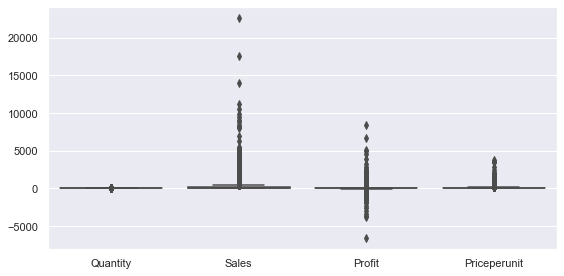

In [27]:
# Set the figure size
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

# Create a box plot using seaborn
sns.set(style="darkgrid")
sns.boxplot(data=df2[['Quantity', 'Sales', 'Profit', 'Priceperunit']])

Since we are predicting sales using different features of the datasset. Therefore, we shall forcust mainly on sales as our independent variable.

<AxesSubplot:ylabel='Sales'>

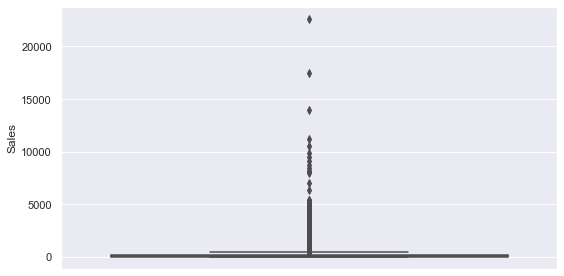

In [28]:
# Set the figure size
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(y=df2['Sales'])

__Let us remove outliers using interquartile range__

In [29]:
# Calculate the IQR of the sales column:

Q1 = df2['Sales'].quantile(0.25)
Q3 = df2['Sales'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Define the upper and lower bounds for outliers:

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [31]:
# Remove the outliers from the sales column:

df2 = df2[(df2['Sales'] > lower_bound) & (df2['Sales'] < upper_bound)]

Inspect 

<AxesSubplot:ylabel='Sales'>

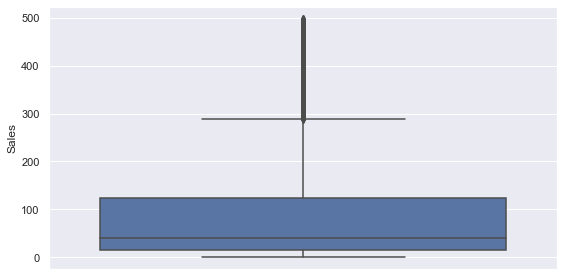

In [32]:
# Set the figure size
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(y=df2['Sales'])

In general, machine learning models work by finding patterns in data to make predictions or classifications. Correlated features can make it more difficult for the model to identify the most important patterns and can lead to overfitting. Overfitting occurs when the model fits the training data too closely, resulting in poor performance on new, unseen data.


However, there are cases where correlated features can be useful. For example, in image recognition, features such as brightness and contrast are often correlated, but can still provide useful information to the model.


In some cases, it may be beneficial to preprocess the data to reduce correlation between features, such as through feature selection or dimensionality reduction techniques.

Let us inspect Correlations to select the most interesting features

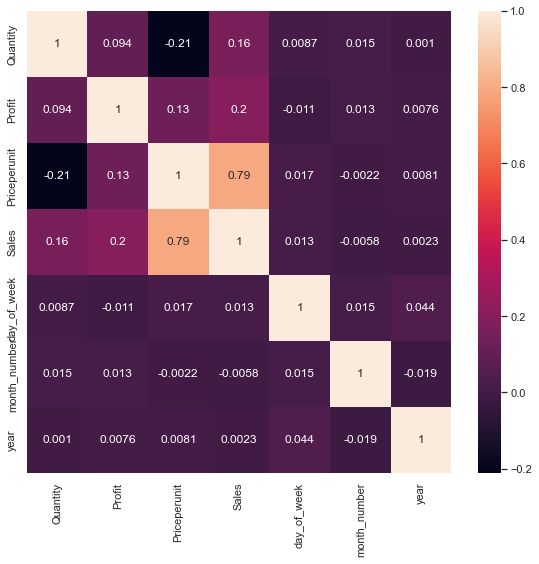

In [33]:
plt.figure(figsize=(8,8))
cor_matrix=df2[['Segment','City','State','Category','Quantity','Profit','Priceperunit','Sales','day_of_week','week_name','month_number','month_name','year']].corr(method="pearson")  # spearman is used as it has outliers 
sns.heatmap(cor_matrix,annot=True);
# Note that pearson correlation is prefered for the data sets without outliers as it is robust compared to spearman

In [34]:
df2.head()

,OrderDate,Segment,City,State,Category,Sales,Quantity,Discount,Profit,Priceperunit,day_of_week,week_name,month_number,month_name,year
0,2016-11-08,Consumer,Henderson,Kentucky,Furniture,261.960,2,0.0,41.9136,130.980,1,Tuesday,11,November,2016
2,2016-06-12,Corporate,Los Angeles,California,Office Supplies,14.620,2,0.0,6.8714,7.310,6,Sunday,6,June,2016
4,2015-10-11,Consumer,Fort Lauderdale,Florida,Office Supplies,22.368,2,0.2,2.5164,11.184,6,Sunday,10,October,2015
5,2014-06-09,Consumer,Los Angeles,California,Furniture,48.860,7,0.0,14.1694,6.980,0,Monday,6,June,2014
6,2014-06-09,Consumer,Los Angeles,California,Office Supplies,7.280,4,0.0,1.9656,1.820,0,Monday,6,June,2014


From the dataframe __(df2)__, we are going to use __sales__ as our independent variable,to be predicted based on __state__, __category__ and __month number__

In [40]:
data = df2[['State','Category','month_number','Sales']]

In [41]:
data.head()

,State,Category,month_number,Sales
0,Kentucky,Furniture,11,261.960
2,California,Office Supplies,6,14.620
4,Florida,Office Supplies,10,22.368
5,California,Furniture,6,48.860
6,California,Office Supplies,6,7.280
